# Task 2 : Prediction using Unsupervised Machine Learning
# GRIP @ The Sparks Foundation
## In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

Technical Stack : Scikit Learn, Numpy, Pandas, Matplotlib

# Step 1 - Loading the dataset


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
iris= pd.read_csv('https://raw.githubusercontent.com/souhaklibi/clusters/main/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris.isnull().sum()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.drop(['Id', 'Species'], axis = 1) 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Determining the optimum number of clusters using "The elbow method"

In [9]:
from sklearn.cluster import KMeans
X = iris.iloc[:, [0, 1, 2, 3]].values
inertia = []
for i in range(1, 15):
    model = KMeans(n_clusters = i).fit(X)
    inertia.append(model.inertia_)

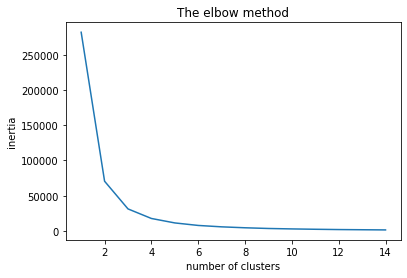

In [10]:
plt.plot(range(1, 15),inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('The elbow method')
plt.show()

The graph above shows that there are 3 clusters as the elbow occurs exactly in number 3.

31320.71120000001

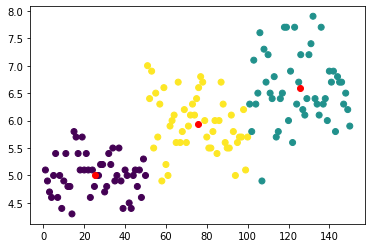

In [31]:
model=KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.inertia_ #sum of distances between the cluster points and the centroid